![Image 2](img1.png)


![Image 2](img2.png)


In [1]:
import warnings
warnings.filterwarnings('ignore')

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


 <h1 style="color:darkblue;"> Dataset importation :</h1>


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Lire le fichier CSV à partir de Google Drive
data = pd.read_csv("/content/drive/MyDrive/imdb_reviews/IMDB Dataset.csv")


 <h1 style="color:darkblue;"> Data Exploration :</h1>


In [4]:
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape


(50000, 2)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


 Check For Null Values In The Dataset

In [ ]:
data.isnull().sum()


,0
review,0
sentiment,0


In [ ]:
data.sentiment.unique()

array(['positive', 'negative'], dtype=object)

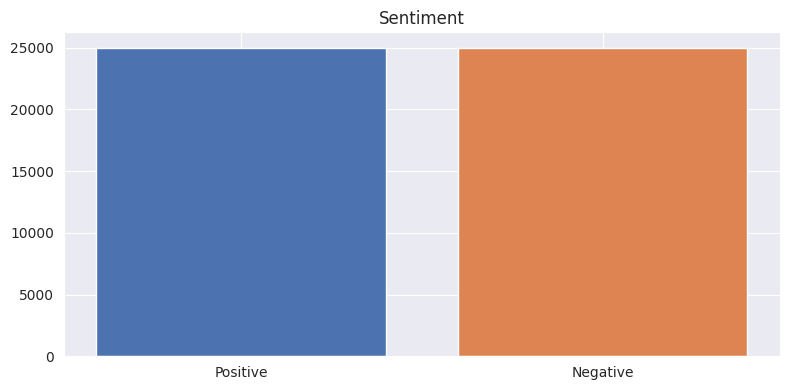

In [ ]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=data.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

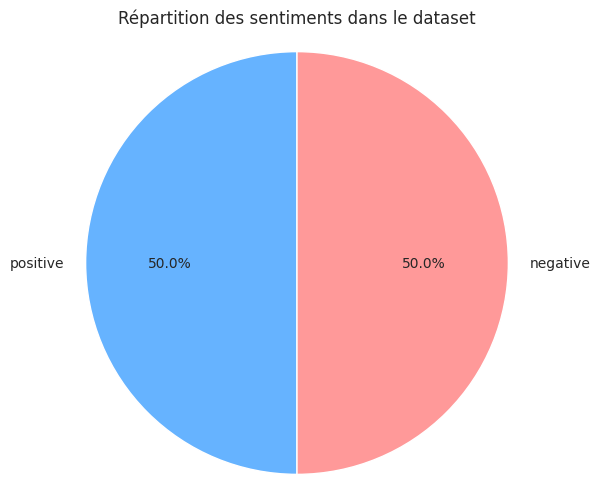

In [ ]:
sentiment_counts = data['sentiment'].value_counts()


labels = sentiment_counts.index  # "positive" et "negative"
sizes = sentiment_counts.values  # Les valeurs correspondantes

# Dessiner le camembert
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])

# Assurer que le graphique est circulaire
plt.axis('equal')

# Ajouter un titre
plt.title("Répartition des sentiments dans le dataset")

# Afficher le graphique
plt.show()


<h1 style="color:darkblue;">Data pre-processing</h1>




## 1. Nettoyage

## 1.a. Enlever les URL's

In [ ]:
# Regex pour les URL
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# Vérifier s'il y a des URL dans la colonne 'review'
reviews_with_urls = data[data['review'].str.contains(url_pattern, na=False)]

# Afficher le nombre de reviews avec des URL
print(f"Nombre de reviews contenant des URL : {len(reviews_with_urls)}")

# Afficher un échantillon de ces reviews
reviews_with_urls.head()


Nombre de reviews contenant des URL : 119


,review,sentiment
907,Following directly from where the story left o...,positive
1088,This quasi J-horror film followed a young woma...,negative
1972,The basic plot of 'Marigold' boasts of a roman...,negative
2132,"I, too, found ""Oppenheimer"" to be a brilliant ...",positive
3200,I think that Mario Van Peebles movie Posse is ...,positive


In [ ]:
# Fonction pour supprimer les URL
data['review'] = data['review'].replace(to_replace=url_pattern, value='', regex=True)

# Vérifier si les URLs ont bien été supprimées
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 1.b. Enlever les balises HTML

In [ ]:
# Regex pour les balises HTML
html_pattern = r'<[^>]+>'

# Vérifier s'il y a des balises HTML dans la colonne 'review'
reviews_with_html = data[data['review'].str.contains(html_pattern, na=False)]

# Afficher le nombre de reviews avec des balises HTML
print(f"Nombre de reviews contenant des balises HTML : {len(reviews_with_html)}")

# Afficher un échantillon de ces reviews
reviews_with_html.head()


Nombre de reviews contenant des balises HTML : 29201


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
data['review'] = data['review'].replace(to_replace=html_pattern, value='', regex=True)

## 1.c. Enlever les punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punc = string.punctuation


In [ ]:

def remove_punc(text):
    return text.translate(str.maketrans('', '', punc))

In [ ]:
# Appliquer la fonction remove_punc à chaque review
data['review'] = data['review'].apply(remove_punc)
data


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


In [ ]:
data.review[0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty pictur

## 1.d. uniformiser le texte en minuscule


In [ ]:
def to_lower_case(text):
    text = text.lower()
    return text

In [ ]:
data['review'] = data['review'].apply(to_lower_case)

In [ ]:
data.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

## 1.e. Traitement des acronymes


In [ ]:
# Regex pour détecter les acronymes
acronym_pattern = r'\b[A-Z]{2,4}\b'
reviews_with_acronyms = data[data['review'].str.contains(acronym_pattern, na=False)]

# Afficher le nombre de reviews avec des acronymes
print(f"Nombre de reviews contenant des acronymes : {len(reviews_with_acronyms)}")

Nombre de reviews contenant des acronymes : 0


## 1.f. Correction orthographe


In [ ]:
from textblob import TextBlob
def correct_spelling(text):
    blob = TextBlob(text)
    return str(blob.correct())


In [ ]:
data['review'] = data['review'].apply(correct_spelling)

##1.g. Enlever les stopwords


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopword:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(" ".join(x).split())

In [ ]:
data['review'] = data['review'].apply(remove_stopwords)

In [ ]:
data.review[0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

##1.h.Traitement les Emojies :

In [ ]:
# Regex pour détecter les émojis
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FAFF"  # Chess Symbols
    "\U00002702-\U000027B0"  # Dingbats
    "]+", flags=re.UNICODE)


In [ ]:
# Vérifier s'il y a des émojis dans la colonne 'review'
reviews_with_emojis = data[data['review'].str.contains(emoji_pattern, na=False)]

# Afficher le nombre de reviews avec des émojis
print(f"Nombre de reviews contenant des émojis : {len(reviews_with_emojis)}")


Nombre de reviews contenant des émojis : 0


## 2. Tokenization

In [ ]:
import spacy

# Charger le modèle linguistique
nlp = spacy.load("en_core_web_sm")
def tokenize_text(text):
    # Utiliser SpaCy pour traiter le texte
    doc = nlp(text)
    # Renvoyer les tokens sous forme de liste
    return [token.text for token in doc]


In [ ]:
# Appliquer la fonction de tokenization à la colonne 'review'
data['tokens'] = data['review'].apply(tokenize_text)

data.head()


,review,sentiment,tokens
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically theres family little boy jake thinks...,negative,"[basically, there, s, family, little, boy, jak..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


## Encodage du Target :

In [ ]:
 data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [ ]:
data1=data.copy()

In [ ]:
data1

,review,tokens,sentiment
0,one reviewers mentioned watching 1 oz episode ...,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn...",1
2,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...",1
3,basically theres family little boy jake thinks...,"[basically, there, s, family, little, boy, jak...",0
4,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,...",1
...,...,...,...
49995,thought movie right good job wasnt creative or...,"[thought, movie, right, good, job, was, nt, cr...",1
49996,bad plot bad dialogue bad acting idiotic direc...,"[bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,catholic taught parochial elementary schools n...,"[catholic, taught, parochial, elementary, scho...",0
49998,im going disagree previous comment side maltin...,"[i, m, going, disagree, previous, comment, sid...",0


In [ ]:
from google.colab import files

data.to_csv('/content/drive/MyDrive/imdb_reviews/data_tokens-encodage.csv', index=False)







## 3. Normalisation :

![Image 2](img3.png)


## 3.a Lemmatization :

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/imdb_reviews/data_tokens-encodage.csv")

In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))  # Joindre les tokens en une seule chaîne de texte
    return [token.lemma_ for token in doc]  # Renvoyer les lemmes des tokens


In [ ]:
data['lemmatized_tokens'] = data['tokens'].apply(lemmatize_tokens)


In [ ]:
data.head()


,review,tokens,sentiment
0,one reviewers mentioned watching 1 oz episode ...,"['one', 'reviewers', 'mentioned', 'watching', ...",1
1,wonderful little production filming technique ...,"['wonderful', 'little', 'production', 'filming...",1
2,thought wonderful way spend time hot summer we...,"['thought', 'wonderful', 'way', 'spend', 'time...",1
3,basically theres family little boy jake thinks...,"['basically', 'there', 's', 'family', 'little'...",0
4,petter matteis love time money visually stunni...,"['petter', 'matteis', 'love', 'time', 'money',...",1


In [ ]:
from google.colab import files
# Exporter le DataFrame en fichier CSV avec le nom souhaité
data.to_csv('/content/drive/MyDrive/imdb_reviews/data_Lemmatization.csv', index=False)



## 3.b. Stemming


In [ ]:
import nltk
from nltk.stem import SnowballStemmer

# Télécharger les données nécessaires
nltk.download('punkt')

# Créer une instance de SnowballStemmer pour l'anglais
stemmer = SnowballStemmer("english")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]


In [ ]:
# Appliquer le stemming à la colonne 'tokens'
data1['stemmed_tokens'] = data1['tokens'].apply(stem_tokens)


In [ ]:
data1.head()

,review,tokens,sentiment,stemmed_tokens
0,one reviewers mentioned watching 1 oz episode ...,"[one, reviewers, mentioned, watching, 1, oz, e...",1,"[one, review, mention, watch, 1, oz, episod, y..."
1,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn...",1,"[wonder, littl, product, film, techniqu, unass..."
2,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...",1,"[thought, wonder, way, spend, time, hot, summe..."
3,basically theres family little boy jake thinks...,"[basically, there, s, family, little, boy, jak...",0,"[basic, there, s, famili, littl, boy, jake, th..."
4,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,...",1,"[petter, mattei, love, time, money, visual, st..."


In [ ]:
data2=data1.copy()

In [ ]:
### Reduction de taille de dataset

A cause de la limitation de temps et des ressources

In [ ]:
# Trier le dataset en fonction de la colonne 'sentiment'
data_sorted = data2.sort_values(by='sentiment')
data_sorted

,review,tokens,sentiment,stemmed_tokens
24999,film never made honestly must admit saw seriou...,"[film, never, made, honestly, must, admit, saw...",0,"[film, never, made, honest, must, admit, saw, ..."
27934,ive fan things bill maher 15 years film disapp...,"[i, ve, fan, things, bill, maher, 15, years, f...",0,"[i, ve, fan, thing, bill, maher, 15, year, fil..."
27933,films premise seems passing world war 2 genera...,"[films, premise, seems, passing, world, war, 2...",0,"[film, premis, seem, pass, world, war, 2, gene..."
27932,noise fails get us understand character tim ro...,"[noise, fails, get, us, understand, character,...",0,"[nois, fail, get, us, understand, charact, tim..."
27927,watched movie first time day bored tears guess...,"[watched, movie, first, time, day, bored, tear...",0,"[watch, movi, first, time, day, bore, tear, gu..."
...,...,...,...,...
10322,year 1896jeff webster james stewart doesnt lik...,"[year, 1896jeff, webster, james, stewart, does...",1,"[year, 1896jeff, webster, jame, stewart, doe, ..."
29375,hey ralf westhoff seems knows lot people nine ...,"[hey, ralf, westhoff, seems, knows, lot, peopl...",1,"[hey, ralf, westhoff, seem, know, lot, peopl, ..."
10323,spoiler warningi got dinodocumentarie dvd chri...,"[spoiler, warningi, got, dinodocumentarie, dvd...",1,"[spoiler, warningi, got, dinodocumentari, dvd,..."
29390,unusual take time travel instead traveling ear...,"[unusual, take, time, travel, instead, traveli...",1,"[unusu, take, time, travel, instead, travel, e..."


In [ ]:
# Extraire 250 lignes de sentiment 0
data_sentiment_0 = data_sorted[data_sorted['sentiment'] == 0].sample(n=250, random_state=42)

# Extraire 250 lignes de sentiment 1
data_sentiment_1 = data_sorted[data_sorted['sentiment'] == 1].sample(n=250, random_state=42)

# Combiner les deux datasets
data_combined = pd.concat([data_sentiment_0, data_sentiment_1])

# Mélanger aléatoirement les 500 lignes
data_shuffled = data_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Afficher le shape pour vérifier
print(data_shuffled.shape)

(500, 4)


In [ ]:
data_shuffled

,review,tokens,sentiment,stemmed_tokens
0,id like say ive seen film twice love acting gr...,"[i, d, like, say, i, ve, seen, film, twice, lo...",1,"[i, d, like, say, i, ve, seen, film, twice, lo..."
1,speechless matty simmons managed something tho...,"[speechless, matty, simmons, managed, somethin...",0,"[speechless, matti, simmon, manag, someth, tho..."
2,gave movie 10 simply sick obsession ingrid ber...,"[gave, movie, 10, simply, sick, obsession, ing...",1,"[gave, movi, 10, simpli, sick, obsess, ingrid,..."
3,tv guide calls movie mystery mystery possible ...,"[tv, guide, calls, movie, mystery, mystery, po...",0,"[tv, guid, call, movi, mysteri, mysteri, possi..."
4,seen romantic comedies one easiestworst attemp...,"[seen, romantic, comedies, one, easiestworst, ...",0,"[seen, romant, comedi, one, easiestworst, atte..."
...,...,...,...,...
495,isnt art innerurban politicallycorrect propaga...,"[is, nt, art, innerurban, politicallycorrect, ...",0,"[is, nt, art, innerurban, politicallycorrect, ..."
496,seems lot people dont know blade actually supe...,"[seems, lot, people, do, nt, know, blade, actu...",1,"[seem, lot, peopl, do, nt, know, blade, actual..."
497,fun entertaining movie wwii german spy julie a...,"[fun, entertaining, movie, wwii, german, spy, ...",1,"[fun, entertain, movi, wwii, german, spi, juli..."
498,film tour de force julie taymor directs stage ...,"[film, tour, de, force, julie, taymor, directs...",1,"[film, tour, de, forc, juli, taymor, direct, s..."


In [ ]:
from google.colab import files
# Exporter le DataFrame en fichier CSV avec le nom souhaité
# Exporter le DataFrame en fichier CSV dans Google Drive
data_shuffled.to_csv('/content/drive/MyDrive/data_stemming_min.csv', index=False)



<h1 style="color:darkblue;">Feature extraction</h1>


![Image 2](img4.png)


## 1. Term Frequency-Inverse Document Frequency (TF-IDF)




### Définition
Le *TF-IDF* est une amélioration du modèle Bag of Words (BOW). Il pondère les mots en fonction de leur importance dans un document particulier tout en réduisant l'importance des mots fréquents dans tout le corpus.

### Calcul
- *TF (Term Frequency)* : Nombre d'occurrences du mot dans le document.
- *IDF (Inverse Document Frequency)* : Mesure de la rareté d'un mot dans l'ensemble des documents du corpus.

La formule du TF-IDF pour un mot est :

$$
\text{TF-IDF}(w, d) = \text{TF}(w, d) \times \log \left( \frac{N}{\text{DF}(w)} \right)
$$

Où :
- \( N \) est le nombre total de documents.
- $( {DF}(w) )$ est le nombre de documents contenant le mot \( w \).

### Exemple
Prenons les deux phrases suivantes :
- "Le chat est noir."
- "Le chien est blanc."

Pour le mot "Le", le TF-IDF est faible car il est présent dans tous les documents. Pour "noir" ou "blanc", le TF-IDF est plus élevé car ces mots apparaissent rarement.
### Avantages :
TF-IDF est simple à implémenter et peu coûteux en termes de calcul.
### Limites
- Toujours basé sur une représentation de mots isolés.
- Peut ne pas capturer la sémantique profonde du texte.


In [20]:
data2 = pd.read_csv("/content/drive/MyDrive/data_stemming_min.csv")

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(data2['review'])
print(f"TF-IDF Vectors:\n{tfidf_matrix}")

TF-IDF Vectors:
  (0, 6064)	0.11632308703265179
  (0, 7211)	0.10097089418228179
  (0, 10687)	0.0788996249821161
  (0, 6587)	0.08898656330730981
  (0, 10872)	0.0697271496500054
  (0, 4626)	0.09195152523395356
  (0, 12893)	0.15181272467192933
  (0, 7359)	0.163289719616345
  (0, 322)	0.0714435906527735
  (0, 5379)	0.13576623498891235
  (0, 4218)	0.11376438383897283
  (0, 12491)	0.16700754695048245
  (0, 11197)	0.12157452489877647
  (0, 9317)	0.22394172288764533
  (0, 9878)	0.14796659795013278
  (0, 13355)	0.1188292900727201
  (0, 12461)	0.14339472934485603
  (0, 8357)	0.07989867882867313
  (0, 5173)	0.09821716815441853
  (0, 1520)	0.1071506117005411
  (0, 9087)	0.06678780814838078
  (0, 6873)	0.09461207350785043
  (0, 12456)	0.08312226902495247
  (0, 7150)	0.18789626304073676
  (0, 11131)	0.10160969235347449
  :	:
  (499, 5162)	0.12184124122984306
  (499, 9190)	0.09996212709768856
  (499, 8224)	0.24368248245968613
  (499, 41)	0.12184124122984306
  (499, 7083)	0.12184124122984306
  (499, 3

### Structure de l'Output

Chaque ligne est de la forme `(i, j) value`, où :

- `i` est l'**index du document** (ici toujours 0, donc on parle du premier document),
- `j` est l'**index du terme** (le numéro de la colonne, représentant un mot du vocabulaire),
- `value` est la **valeur TF-IDF** pour ce terme dans ce document, représentant l'importance du terme dans le document en question.

### Explication des valeurs :

- `(0, 6064) 0.1163` : Dans le **document 0** (premier document), le terme correspondant à l'**index 6064** (un mot particulier du vocabulaire) a une importance TF-IDF de **0.1163**.


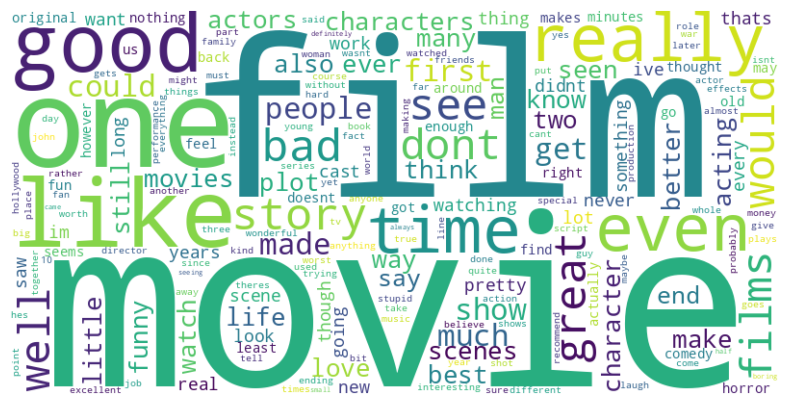

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convertir la matrice TF-IDF en DataFrame pour faciliter l'analyse
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calculer la somme des scores TF-IDF pour chaque mot
tfidf_sum = tfidf_df.sum(axis=0)

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_sum)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ne pas afficher les axes
plt.show()


## 2. Word Embedding


L'incorporation de mots (Word embedding) est une technique qui mappe les mots à des vecteurs continus dans un espace de dimensions réduites. Ces vecteurs capturent les relations sémantiques entre les mots, permettant aux machines de comprendre leur signification.

Les Word Embedding sont apprises à partir de grands corpus de texte, ce qui leur permet de capturer des informations contextuelles et les relations entre les mots. Ces incorporations sont essentielles pour diverses tâches de traitement du langage naturel (NLP) telles que la classification de texte, la traduction automatique et l'analyse des sentiments.

### 2.a  Word2Vec

![Image 5](img5.png)




#### Définition
*Word2Vec* est une méthode populaire de création de représentations vectorielles denses (plongements lexicaux) pour les mots. Contrairement aux représentations classiques comme BOW et TF-IDF, Word2Vec permet de capturer les relations sémantiques entre les mots.

#### Approches principales

Word2Vec propose deux approches principales pour entraîner les vecteurs de mots : *CBOW* (Continuous Bag of Words) et *Skip-gram*.


#### Avantages
- *Word2Vec* capture des relations sémantiques, ce qui signifie que des mots ayant des significations similaires se retrouvent proches dans l’espace vectoriel.
- Les relations mathématiques entre les mots peuvent être observées, par exemple :

$$
\text{roi} - \text{homme} + \text{femme} \approx \text{reine}
$$

#### Limites
- Ne prend pas en compte le *contexte dynamique* des mots dans des phrases spécifiques. Chaque mot a un seul vecteur, quel que soit le contexte dans lequel il apparaît.


#### CBOW (Continuous Bag of Words)
Dans cette approche, le modèle prédit un mot central à partir de son *contexte* (les mots environnants). Autrement dit, pour chaque mot \( w_i \), le modèle utilise les mots qui l'entourent pour deviner le mot \( w_i \).

- *Objectif* : prédire le mot central en utilisant une fenêtre de mots de part et d'autre du mot cible.

- *Avantage* : plus rapide à entraîner que le Skip-gram car il est plus facile d'optimiser les prédictions du mot central.


#### Skip-gram
Dans l'approche *Skip-gram*, le modèle fait l'inverse de CBOW : il utilise un mot central pour prédire les mots de son *contexte* (les mots qui l'entourent).

- *Objectif* : prédire les mots du contexte à partir d'un mot central \( w_i \).

- *Avantage* : Skip-gram fonctionne mieux avec de petits ensembles de données et peut mieux capturer les relations pour des mots rares.

#### Exemple
Prenons une phrase simple : "Le chat est sur le tapis."
- En *CBOW*, le modèle pourrait prédire "chat" en utilisant le contexte "Le" et "est".
- En *Skip-gram*, le modèle pourrait utiliser "chat" pour prédire "Le" et "est".


#### 2.a.1  CBOW


In [8]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

sentences = data2['stemmed_tokens'].tolist()
# Créer le modèle Word2Vec en utilisant CBOW
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)
word2vec_matrix = np.array([np.mean([model.wv[word] for word in text if word in model.wv]
                                    or [np.zeros(100)], axis=0) for text in sentences])

In [9]:
print(f"Word2Vec (CBOW) Vectors:\n{word2vec_matrix}")

Word2Vec (CBOW) Vectors:
[[-0.21499157  0.2919405   0.03704807 ... -0.07497811  0.08804061
  -0.05267645]
 [-0.21300031  0.28189525  0.03814064 ... -0.06529112  0.0866131
  -0.04446195]
 [-0.20321216  0.27768657  0.03542815 ... -0.0640827   0.08030146
  -0.04228318]
 ...
 [-0.20825419  0.2756565   0.03470527 ... -0.06985933  0.08969656
  -0.05285606]
 [-0.20751818  0.28678456  0.03458229 ... -0.0682795   0.08584756
  -0.03973673]
 [-0.20937395  0.2835734   0.03431136 ... -0.07238527  0.08791506
  -0.04564522]]


#### 2.a.2  SkipGram


In [10]:
skip_gram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)
skipgram_matrix = np.array([np.mean([skip_gram_model.wv[word] for word in text if word in skip_gram_model.wv]
                                    or [np.zeros(100)], axis=0) for text in sentences])
print(f"Skip-gram Vectors:\n{skipgram_matrix}")

Skip-gram Vectors:
[[-0.06227504  0.12245879  0.08834965 ... -0.04374762  0.0210478
   0.03388071]
 [-0.0623919   0.1235697   0.08709196 ... -0.04361182  0.02110898
   0.03434571]
 [-0.06040754  0.11943446  0.08530844 ... -0.04621927  0.02007457
   0.03336707]
 ...
 [-0.06265245  0.12079435  0.08492119 ... -0.04353136  0.02255687
   0.03364753]
 [-0.06180378  0.12430431  0.08381201 ... -0.04473075  0.02277714
   0.0340504 ]
 [-0.06142421  0.12334532  0.08467712 ... -0.04250643  0.02342732
   0.03399651]]


In [13]:
skipgram_matrix.shape

(500, 100)

### 2.b  Glove (Global Vectors for Word Representation)




#### Définition
*GloVe* est une autre méthode pour apprendre des représentations vectorielles des mots, similaire à Word2Vec. Cependant, GloVe combine à la fois des approches locales et globales de la co-occurrence des mots pour mieux capturer les relations sémantiques.

#### Principe de base
Contrairement à Word2Vec qui se base uniquement sur les relations locales des mots dans une fenêtre contextuelle, *GloVe* utilise une *matrice de co-occurrence* qui capture les relations globales entre les mots dans un corpus.

- Chaque entrée de la matrice de co-occurrence \( X \) représente combien de fois deux mots apparaissent ensemble dans un contexte défini.
- GloVe cherche à factoriser cette matrice en des vecteurs de dimension réduite pour chaque mot.



#### Exemple
Si le mot "chat" apparaît souvent avec "animal" dans un grand corpus, GloVe apprendra un vecteur de "chat" proche de celui d'"animal" dans l’espace vectoriel.

#### Comparaison avec Word2Vec
- *Word2Vec* se base sur les fenêtres de contexte local autour de chaque mot, tandis que *GloVe* exploite des statistiques globales sur tout le corpus.
- GloVe est généralement plus efficace pour capturer des relations entre des mots qui apparaissent rarement ensemble, mais qui ont des associations indirectes (via des mots communs dans leur contexte).

#### Avantages
- GloVe utilise l'information globale du corpus entier, capturant ainsi des relations à longue distance entre les mots.
- Comme Word2Vec, GloVe peut aussi révéler des relations analogiques comme :

$$
\text{Paris} - \text{France} + \text{Italie} \approx \text{Rome}
$$

#### Limites
- Comme Word2Vec, GloVe attribue un seul vecteur fixe à chaque mot, ce qui ne permet pas de capturer les différentes significations d'un même mot en fonction du contexte.


In [14]:
glove_matrix = np.array([nlp(' '.join(text)).vector for text in sentences])
print(f"GloVe Vectors:\n{glove_matrix}")

GloVe Vectors:
[[-0.00849546 -0.05030136  0.00986344 ... -0.32834992  0.19146694
   0.12692125]
 [ 0.02185908 -0.07585295  0.01347126 ... -0.2965651   0.12549017
   0.15727155]
 [ 0.02430857 -0.09619004  0.04092283 ... -0.3025919   0.10738773
   0.14399146]
 ...
 [ 0.01798448 -0.0909197   0.03230946 ... -0.29556766  0.12640457
   0.18712866]
 [ 0.01564498 -0.07025109  0.01232056 ... -0.26916698  0.08453228
   0.21002537]
 [-0.00899937 -0.11899932  0.05131048 ... -0.27950934  0.0887204
   0.1758706 ]]


### 2.c.  FastText


#### Définition
*FastText* est une méthode développée par Facebook AI Research, qui améliore Word2Vec en prenant en compte non seulement les mots mais aussi les sous-mots, ce qui permet de mieux capturer la morphologie des mots.

#### Principe de base
Contrairement à Word2Vec qui représente chaque mot par un seul vecteur, *FastText* décompose chaque mot en *n-grammes* (sous-séquences de caractères). Par exemple, le mot "chat" sera décomposé en n-grammes comme "ch", "cha", "hat", etc. Le vecteur final d’un mot est alors la somme des vecteurs de ses sous-mots.

- Cela permet à FastText de générer des vecteurs pour des mots *inconnus* ou *rares*, en se basant sur leurs sous-mots, ce qui améliore les performances sur des langues avec des morphologies riches.

#### Exemple
Prenons les mots "chat" et "chats" :
- Dans Word2Vec, ces deux mots auraient des vecteurs complètement différents.
- Avec *FastText*, les vecteurs seraient plus proches, car ils partagent des sous-séquences ("ch", "ha", "at").

#### Avantages
- *Meilleure gestion des mots rares ou inconnus* : Les mots inconnus peuvent être représentés à travers leurs sous-mots, contrairement à Word2Vec qui ne peut pas traiter un mot qui n’est pas dans son vocabulaire.
- *Capturer la morphologie des mots* : FastText est particulièrement utile pour les langues avec une morphologie riche (comme l'allemand ou le turc), où les mots sont souvent construits à partir de racines et d'affixes.


#### Comparaison avec Word2Vec
- *FastText* est une extension de Word2Vec mais avec des sous-mots, ce qui permet d'obtenir des vecteurs plus robustes pour les mots inconnus ou mal orthographiés.
- Les performances sur les tâches de classification et de similarité de mots sont souvent meilleures avec FastText que Word2Vec.

#### Limites
- FastText peut être plus lent à entraîner que Word2Vec, car il doit générer et traiter des n-grammes pour chaque mot.
- Il ne prend pas en compte le contexte dynamique des mots dans une phrase, comme les méthodes basées sur les réseaux neuronaux de type transformers (ex: BERT).


In [15]:
from gensim.models import Word2Vec, FastText

fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=1)
fasttext_matrix = np.array([np.mean([fasttext_model.wv[word] for word in text if word in fasttext_model.wv]
                                    or [np.zeros(100)], axis=0) for text in sentences])
print(f"FastText Vectors:\n{fasttext_matrix}")

FastText Vectors:
[[-0.09594116  0.12065709 -0.12058964 ... -0.11929242  0.04254665
  -0.07716929]
 [-0.09780717  0.11527793 -0.11905961 ... -0.10815948  0.0402039
  -0.06887487]
 [-0.09500854  0.11372557 -0.12051991 ... -0.10040489  0.02705208
  -0.06970431]
 ...
 [-0.09539285  0.11035939 -0.12191984 ... -0.11246524  0.03654739
  -0.0668297 ]
 [-0.09776816  0.12344117 -0.12399952 ... -0.11593307  0.04095615
  -0.06454919]
 [-0.0989232   0.11835828 -0.12041424 ... -0.1134939   0.03850067
  -0.07230177]]


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculer la similarité cosinus pour TF-IDF
similarity_tfidf = cosine_similarity(tfidf_matrix)

# Calculer la similarité cosinus pour Word2Vec (CBOW et Skip-gram)
similarity_cbow = cosine_similarity(word2vec_matrix)
similarity_skipgram = cosine_similarity(skipgram_matrix)

# Calculer la similarité cosinus pour GloVe
similarity_glove = cosine_similarity(glove_matrix)

# Calculer la similarité cosinus pour FastText
similarity_fasttext = cosine_similarity(fasttext_matrix)


In [17]:
similarity_cbow


array([[1.        , 0.9991081 , 0.99835634, ..., 0.99859345, 0.9964947 ,
        0.99870676],
       [0.9991081 , 1.        , 0.99907154, ..., 0.99939466, 0.99654853,
        0.9983493 ],
       [0.99835634, 0.99907154, 1.        , ..., 0.9982249 , 0.9945802 ,
        0.99731255],
       ...,
       [0.99859345, 0.99939466, 0.9982249 , ..., 1.0000002 , 0.99749947,
        0.9987405 ],
       [0.9964947 , 0.99654853, 0.9945802 , ..., 0.99749947, 1.0000002 ,
        0.9989297 ],
       [0.99870676, 0.9983493 , 0.99731255, ..., 0.9987405 , 0.9989297 ,
        1.0000001 ]], dtype=float32)

In [18]:
data2

,review,tokens,sentiment,stemmed_tokens
0,id like say ive seen film twice love acting gr...,"['i', 'd', 'like', 'say', 'i', 've', 'seen', '...",1,"['i', 'd', 'like', 'say', 'i', 've', 'seen', '..."
1,speechless matty simmons managed something tho...,"['speechless', 'matty', 'simmons', 'managed', ...",0,"['speechless', 'matti', 'simmon', 'manag', 'so..."
2,gave movie 10 simply sick obsession ingrid ber...,"['gave', 'movie', '10', 'simply', 'sick', 'obs...",1,"['gave', 'movi', '10', 'simpli', 'sick', 'obse..."
3,tv guide calls movie mystery mystery possible ...,"['tv', 'guide', 'calls', 'movie', 'mystery', '...",0,"['tv', 'guid', 'call', 'movi', 'mysteri', 'mys..."
4,seen romantic comedies one easiestworst attemp...,"['seen', 'romantic', 'comedies', 'one', 'easie...",0,"['seen', 'romant', 'comedi', 'one', 'easiestwo..."
...,...,...,...,...
495,isnt art innerurban politicallycorrect propaga...,"['is', 'nt', 'art', 'innerurban', 'politically...",0,"['is', 'nt', 'art', 'innerurban', 'politically..."
496,seems lot people dont know blade actually supe...,"['seems', 'lot', 'people', 'do', 'nt', 'know',...",1,"['seem', 'lot', 'peopl', 'do', 'nt', 'know', '..."
497,fun entertaining movie wwii german spy julie a...,"['fun', 'entertaining', 'movie', 'wwii', 'germ...",1,"['fun', 'entertain', 'movi', 'wwii', 'german',..."
498,film tour de force julie taymor directs stage ...,"['film', 'tour', 'de', 'force', 'julie', 'taym...",1,"['film', 'tour', 'de', 'forc', 'juli', 'taymor..."


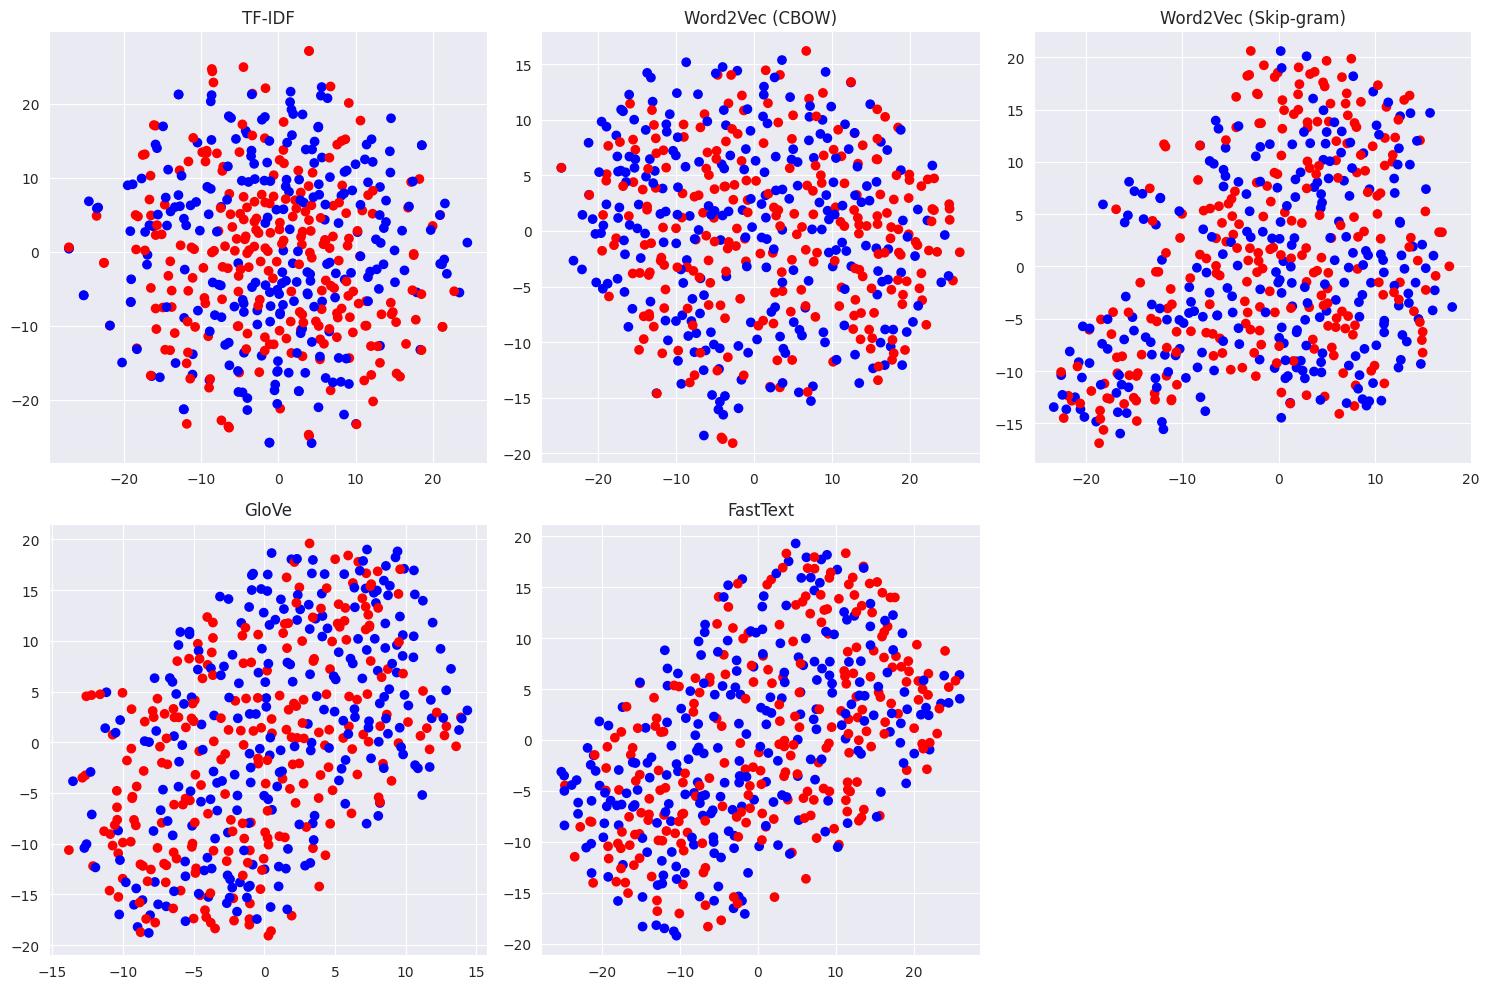

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Réduction de dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Appliquer t-SNE à chaque matrice
tsne_tfidf = tsne.fit_transform(tfidf_matrix.toarray())
tsne_word2vec = tsne.fit_transform(word2vec_matrix)
tsne_skipgram = tsne.fit_transform(skipgram_matrix)
tsne_glove = tsne.fit_transform(glove_matrix)
tsne_fasttext = tsne.fit_transform(fasttext_matrix)

# Utiliser la colonne 'sentiment' pour les labels (1 = positif, 0 = négatif)
# Assurez-vous que cette colonne est alignée avec vos données de matrice.
colors = ['blue' if sentiment == 1 else 'red' for sentiment in data2['sentiment']]

# Visualiser avec coloration par classe
plt.figure(figsize=(15, 10))

# TF-IDF
plt.subplot(231)
plt.scatter(tsne_tfidf[:, 0], tsne_tfidf[:, 1], c=colors)
plt.title('TF-IDF')

# Word2Vec (CBOW)
plt.subplot(232)
plt.scatter(tsne_word2vec[:, 0], tsne_word2vec[:, 1], c=colors)
plt.title('Word2Vec (CBOW)')

# Skip-gram
plt.subplot(233)
plt.scatter(tsne_skipgram[:, 0], tsne_skipgram[:, 1], c=colors)
plt.title('Word2Vec (Skip-gram)')

# GloVe
plt.subplot(234)
plt.scatter(tsne_glove[:, 0], tsne_glove[:, 1], c=colors)
plt.title('GloVe')

# FastText
plt.subplot(235)
plt.scatter(tsne_fasttext[:, 0], tsne_fasttext[:, 1], c=colors)
plt.title('FastText')

plt.tight_layout()
plt.show()


### **Interprétation des Résultats**

Plus les points sont proches, plus les vecteurs sont similaires.

---

1. **TF-IDF**  
   - **Visualisation** : Les points sont dispersés de manière assez uniforme.  
   - **Interprétation** : La méthode TF-IDF, qui se concentre sur le poids des mots en fonction de leur fréquence dans un document par rapport à l'ensemble du corpus, ne capture pas nécessairement les relations sémantiques entre les mots, ce qui se traduit par une distribution moins compacte dans l'espace.

2. **Word2Vec (CBOW)**  
   - **Visualisation** : Une certaine structure est visible, mais les points sont encore relativement dispersés.  
   - **Interprétation** : Le modèle CBOW, qui prédit un mot en fonction des mots environnants, crée des vecteurs qui capturent certaines relations sémantiques, mais il peut encore manquer de précision pour des distinctions plus fines.

3. **Word2Vec (Skip-gram)**  
   - **Visualisation** : Les points semblent former des clusters, avec une certaine structure apparente.  
   - **Interprétation** : Le modèle Skip-gram est souvent plus efficace pour capturer des relations sémantiques complexes, car il prédit les mots environnants à partir d'un mot donné. Cela se traduit par des vecteurs plus regroupés et structurés.

4. **GloVe**  
   - **Visualisation** : Les points montrent une distribution plus dense avec des clusters plus marqués.  
   - **Interprétation** : GloVe, qui utilise des statistiques globales sur les cooccurrences de mots pour créer des représentations vectorielles, semble bien capturer les relations sémantiques, comme en témoigne la meilleure structure des clusters.

5. **FastText**  
   - **Visualisation** : Une distribution encore plus dense et structurée, avec des points qui semblent former des groupes.  
   - **Interprétation** : FastText, qui prend en compte les sous-mots, semble le mieux capturer la sémantique des mots, en particulier pour les mots rares ou composés. Cela se traduit par des clusters bien définis, indiquant que des mots sémantiquement similaires sont plus proches les uns des autres.

---

### Conclusion

Les résultats montrent clairement que les méthodes basées sur des modèles de mots (comme Word2Vec, GloVe et FastText) capturent mieux les relations sémantiques entre les mots par rapport à TF-IDF.


In [ ]:
from scipy.spatial.distance import euclidean

# Fonction pour calculer la distance euclidienne moyenne
def average_euclidean_distance(matrix):
    distances = []
    for i in range(len(matrix)):
        for j in range(i + 1, len(matrix)):
            distances.append(euclidean(matrix[i], matrix[j]))
    return np.mean(distances)

# Calculer les distances euclidiennes moyennes pour chaque technique
avg_distance_tfidf = average_euclidean_distance(tfidf_matrix.toarray())
avg_distance_w2v = average_euclidean_distance(word2vec_matrix)
avg_distance_skipgram = average_euclidean_distance(skipgram_matrix)
avg_distance_glove = average_euclidean_distance(glove_matrix)
avg_distance_fasttext = average_euclidean_distance(fasttext_matrix)

# Afficher les résultats
print(f"Moyenne des distances Euclidiennes :")
print(f"TF-IDF: {avg_distance_tfidf:.4f}")
print(f"Word2Vec (CBOW): {avg_distance_w2v:.4f}")
print(f"Word2Vec (Skip-gram): {avg_distance_skipgram:.4f}")
print(f"GloVe: {avg_distance_glove:.4f}")
print(f"FastText: {avg_distance_fasttext:.4f}")


Moyenne des distances Euclidiennes :
TF-IDF: 1.3937
Word2Vec (CBOW): 0.0837
Word2Vec (Skip-gram): 0.0242
GloVe: 0.3398
FastText: 0.0801


In [22]:
import numpy as np
from scipy.spatial.distance import euclidean

# Fonction pour calculer la distance euclidienne moyenne pour la classe sentiment=0
def average_euclidean_distance(matrix, sentiment_column):
    distances = []
    filtered_matrix = matrix[sentiment_column == 0]
    for i in range(len(filtered_matrix)):
        for j in range(i + 1, len(filtered_matrix)):
            distances.append(euclidean(filtered_matrix[i], filtered_matrix[j]))
    return np.mean(distances)

# Extraire la colonne 'sentiment' (pour faciliter la sélection)
sentiment_column = data2['sentiment'].values

# Calculer les distances euclidiennes moyennes pour chaque technique, uniquement pour sentiment=0
avg_distance_tfidf = average_euclidean_distance(tfidf_matrix.toarray(), sentiment_column)
avg_distance_w2v = average_euclidean_distance(word2vec_matrix, sentiment_column)
avg_distance_skipgram = average_euclidean_distance(skipgram_matrix, sentiment_column)
avg_distance_glove = average_euclidean_distance(glove_matrix, sentiment_column)
avg_distance_fasttext = average_euclidean_distance(fasttext_matrix, sentiment_column)

# Afficher les résultats
print(f"Moyenne des distances Euclidiennes (sentiment=0) :")
print(f"TF-IDF: {avg_distance_tfidf:.4f}")
print(f"Word2Vec (CBOW): {avg_distance_w2v:.4f}")
print(f"Word2Vec (Skip-gram): {avg_distance_skipgram:.4f}")
print(f"GloVe: {avg_distance_glove:.4f}")
print(f"FastText: {avg_distance_fasttext:.4f}")


Moyenne des distances Euclidiennes (sentiment=0) :
TF-IDF: 1.3919
Word2Vec (CBOW): 0.0838
Word2Vec (Skip-gram): 0.0229
GloVe: 0.3255
FastText: 0.0744


In [23]:
import numpy as np
from scipy.spatial.distance import euclidean

# Fonction pour calculer la distance euclidienne moyenne pour la classe sentiment=0
def average_euclidean_distance(matrix, sentiment_column):
    distances = []
    # Filtrer les vecteurs correspondant à sentiment=0
    filtered_matrix = matrix[sentiment_column == 1]
    for i in range(len(filtered_matrix)):
        for j in range(i + 1, len(filtered_matrix)):
            distances.append(euclidean(filtered_matrix[i], filtered_matrix[j]))
    return np.mean(distances)

# Extraire la colonne 'sentiment' (pour faciliter la sélection)
sentiment_column = data2['sentiment'].values

# Calculer les distances euclidiennes moyennes pour chaque technique, uniquement pour sentiment=0
avg_distance_tfidf = average_euclidean_distance(tfidf_matrix.toarray(), sentiment_column)
avg_distance_w2v = average_euclidean_distance(word2vec_matrix, sentiment_column)
avg_distance_skipgram = average_euclidean_distance(skipgram_matrix, sentiment_column)
avg_distance_glove = average_euclidean_distance(glove_matrix, sentiment_column)
avg_distance_fasttext = average_euclidean_distance(fasttext_matrix, sentiment_column)

# Afficher les résultats
print(f"Moyenne des distances Euclidiennes (sentiment=1) :")
print(f"TF-IDF: {avg_distance_tfidf:.4f}")
print(f"Word2Vec (CBOW): {avg_distance_w2v:.4f}")
print(f"Word2Vec (Skip-gram): {avg_distance_skipgram:.4f}")
print(f"GloVe: {avg_distance_glove:.4f}")
print(f"FastText: {avg_distance_fasttext:.4f}")


Moyenne des distances Euclidiennes (sentiment=0) :
TF-IDF: 1.3938
Word2Vec (CBOW): 0.0869
Word2Vec (Skip-gram): 0.0241
GloVe: 0.3521
FastText: 0.0778


###**Interprétation des Résultats**



Une distance plus faible peut indiquer que les vecteurs d'une technique sont plus proches les uns des autres, ce qui peut être interprété comme une meilleure capacité à capturer la similarité sémantique.

---


#### *TF-IDF :* 1.3937

La distance Euclidienne pour TF-IDF est relativement élevée. Cela peut indiquer que les vecteurs de TF-IDF sont plus dispersés, ce qui pourrait signifier que cette méthode capture moins bien la similarité sémantique entre les documents par rapport aux autres méthodes.

#### *Word2Vec (CBOW):* 0.0837

La distance pour CBOW est beaucoup plus faible, suggérant que les vecteurs de cette méthode sont assez proches les uns des autres. Cela peut indiquer une meilleure capacité à capturer des relations sémantiques entre les mots dans le contexte donné.

#### *Word2Vec (Skip-gram) :* 0.0242

La distance est encore plus faible pour le modèle Skip-gram. Cela pourrait signifier que cette technique est particulièrement efficace pour créer des représentations vectorielles très proches en termes de signification, capturant les similarités sémantiques de manière optimale.

####*GloVe :* 0.3398

GloVe a une distance plus élevée que Skip-gram et CBOW, mais plus faible que TF-IDF. Cela indique qu'il se situe entre ces deux extrêmes, offrant un bon compromis dans la capture de la similarité sémantique.
####*FastText :* 0.0801

La distance pour FastText est similaire à celle de CBOW.

#### Conclusion
**=>** Les modèles Word2Vec, en particulier le Skip-gram, semblent offrir les meilleures performances en termes de similarité sémantique, suivis par GloVe et FastText.
